In [2]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing import image 
from keras.optimizers import RMSprop 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np

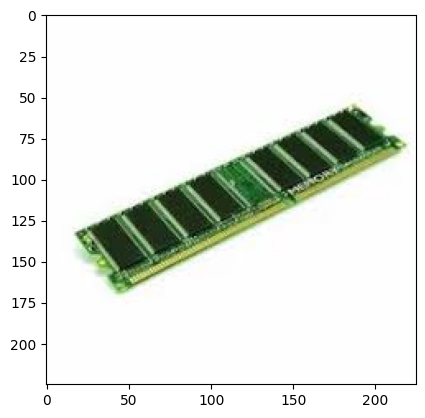

In [3]:
img = image.load_img('basedata/training/ram/3.jpg')
plt.imshow(img)

In [4]:
cv2.imread('basedata/training/ram/3.jpg').shape

(225, 225, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory(
    'basedata/training/', 
    target_size = (200,200),
    batch_size = 3,
    class_mode = 'binary')

validation_dataset = train.flow_from_directory(
    'basedata/validation/', 
    target_size = (200,200),
    batch_size = 3,
    class_mode = 'binary')

Found 21 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'cpu': 0, 'ram': 1}

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16 , (3,3) , activation = 'relu' , input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    ##
    tf.keras.layers.Flatten(),
    ##
    tf.keras.layers.Dense(512 , activation = 'relu'),
    ##
    tf.keras.layers.Dense(1 , activation = 'sigmoid'),
])

In [9]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics = ['accuracy']
)

In [10]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch = 5,
    epochs = 30,
    validation_data = validation_dataset
)

Epoch 1/30


5/5 [==============================] - 8s 581ms/step - loss: 15.7645 - accuracy: 0.6000 - val_loss: 1.2930 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 2s 423ms/step - loss: 1.3920 - accuracy: 0.3333 - val_loss: 0.7059 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 2s 374ms/step - loss: 0.8101 - accuracy: 0.5333 - val_loss: 0.6792 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 2s 349ms/step - loss: 0.8351 - accuracy: 0.8000 - val_loss: 0.9667 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 2s 351ms/step - loss: 0.5143 - accuracy: 0.6667 - val_loss: 0.8602 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 2s 528ms/step - loss: 0.2670 - accuracy: 0.9333 - val_loss: 2.2297 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 2s 492ms/step - loss: 0.5369 - accuracy: 0.8000 - val_loss: 0.7084 - val_accuracy: 0.7000
Epoch 8/30
5/5 [=

In [11]:
def predict_object(path) :
    #for i in os.listdir(path):
    img = image.load_img(path , target_size = (200,200))
    plt.imshow(img)
    #plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X , axis = 0)
    images = np.vstack([X])

    val = model.predict(images)
    if val == 0 :
        return "Central Processing Unit (CPU)"
    elif val == 1 :
        return "Random Access Memory (RAM)"
    else :
        return "Not recognized"


In [45]:
model.save('./model/model.h5')

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 106ms/step


'Central Processing Unit (CPU)'

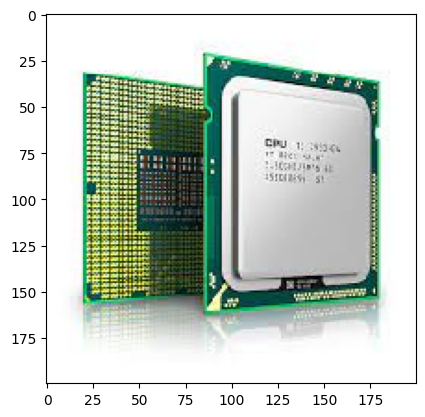

In [47]:
predict_object('./basedata/testing/cpu6.jpg')